In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

train_path = '../data/clean-dirty-garbage-containers/train'
eval_path = '../data/clean-dirty-garbage-containers/test'

In [12]:
os.path.isdir(train_path)

True

In [13]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    preprocessing_function=preprocess_input
)

eval_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.1,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    preprocessing_function=preprocess_input
)

data_train_generator = train_generator.flow_from_directory(train_path, target_size=(224, 224),
                                   class_mode='binary', batch_size=32)
data_eval_generator = train_generator.flow_from_directory(eval_path, target_size=(224, 224),
                                   class_mode='binary', batch_size=128)

Found 2217 images belonging to 2 classes.
Found 1195 images belonging to 2 classes.


In [14]:
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

2021-08-21 21:03:04.950653: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-21 21:03:04.952270: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-08-21 21:03:05.655589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-21 21:03:05.656242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce MX150 computeCapability: 6.1
coreClock: 1.5315GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 44.76GiB/s
2021-08-21 21:03:05.656568: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or direc

9412608/9406464 [==============================] - 1s 0us/step


In [15]:
for layer in base_model.layers:
    layer.trainable = False
    
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 1024)              1311744   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 3,570,753
Trainable params: 1,312,769
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor="val_loss",
    patience=3
)

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

history = model.fit(data_train_generator, epochs=50, validation_data=data_eval_generator, callbacks=[es])

2021-08-21 21:03:21.159906: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-21 21:03:21.177062: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


Epoch 1/50


2021-08-21 21:03:23.599403: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 154140672 exceeds 10% of free system memory.
2021-08-21 21:03:23.623015: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 156905472 exceeds 10% of free system memory.
2021-08-21 21:03:23.696723: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 57802752 exceeds 10% of free system memory.
2021-08-21 21:03:23.705888: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 57802752 exceeds 10% of free system memory.
2021-08-21 21:03:23.734725: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 57802752 exceeds 10% of free system memory.


70/70 [==============================] - 82s 1s/step - loss: 1.5990 - accuracy: 0.5988 - val_loss: 0.7315 - val_accuracy: 0.5615
Epoch 2/50
70/70 [==============================] - 78s 1s/step - loss: 0.6017 - accuracy: 0.7013 - val_loss: 0.3220 - val_accuracy: 0.8736
Epoch 3/50
70/70 [==============================] - 78s 1s/step - loss: 0.5538 - accuracy: 0.7416 - val_loss: 0.3355 - val_accuracy: 0.8603
Epoch 4/50
70/70 [==============================] - 79s 1s/step - loss: 0.5193 - accuracy: 0.7550 - val_loss: 0.3187 - val_accuracy: 0.8636
Epoch 5/50
70/70 [==============================] - 77s 1s/step - loss: 0.5089 - accuracy: 0.7674 - val_loss: 0.3883 - val_accuracy: 0.8033
Epoch 6/50
70/70 [==============================] - 77s 1s/step - loss: 0.5327 - accuracy: 0.7573 - val_loss: 0.2940 - val_accuracy: 0.8803
Epoch 7/50
70/70 [==============================] - 77s 1s/step - loss: 0.4566 - accuracy: 0.7921 - val_loss: 0.2807 - val_accuracy: 0.8828
Epoch 8/50
70/70 [=============

In [17]:
model.evaluate(data_eval_generator)

10/10 [==============================] - 31s 3s/step - loss: 0.3664 - accuracy: 0.8251


[0.36637774109840393, 0.8251045942306519]

In [18]:
model.evaluate(data_train_generator)

70/70 [==============================] - 47s 674ms/step - loss: 0.3602 - accuracy: 0.8381


[0.36020833253860474, 0.8380694389343262]

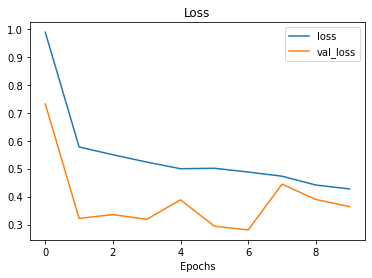

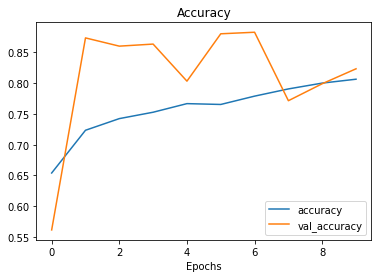

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pylab as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.show()
plt.clf()

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.show()
plt.clf()

In [20]:
model.save('classification_model.h5')